In [ ]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_a = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/trainA_31.csv')
test_a = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/testA_31.csv')
trainto = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/train_T_O.csv')
testto = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/test_T_O.csv')

In [ ]:
train_a.head(2)

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_128,X_129,X_130,X_131,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,time
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,7813.0,7813.0,NaN,NaN,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,05:14:00
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,19854.0,19854.0,...,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN,05:22:00


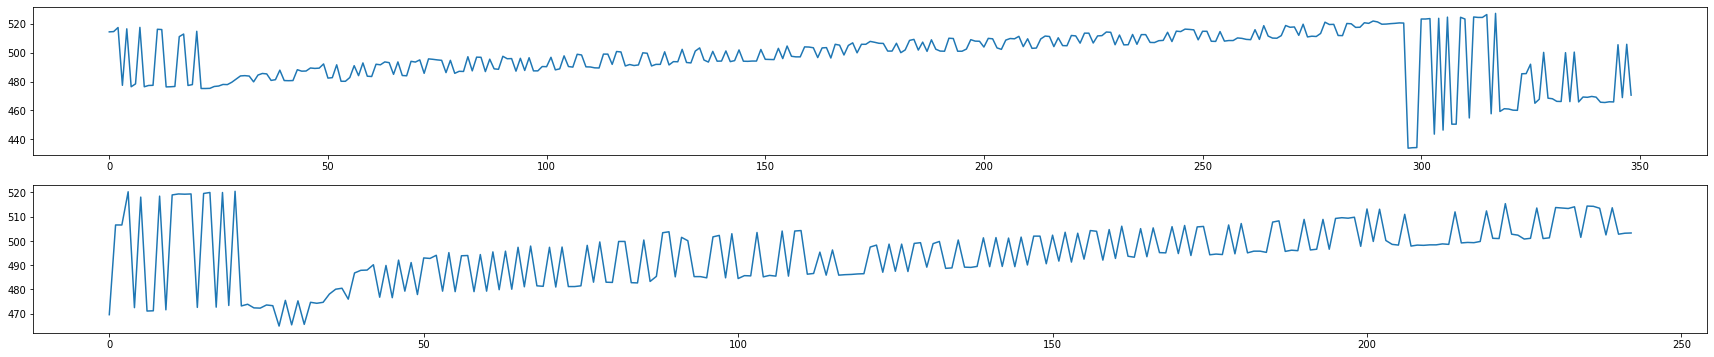

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(2,1,1)
plt.plot(trainto['X_11'])
plt.subplot(2,1,2)
plt.plot(testto['X_11'])

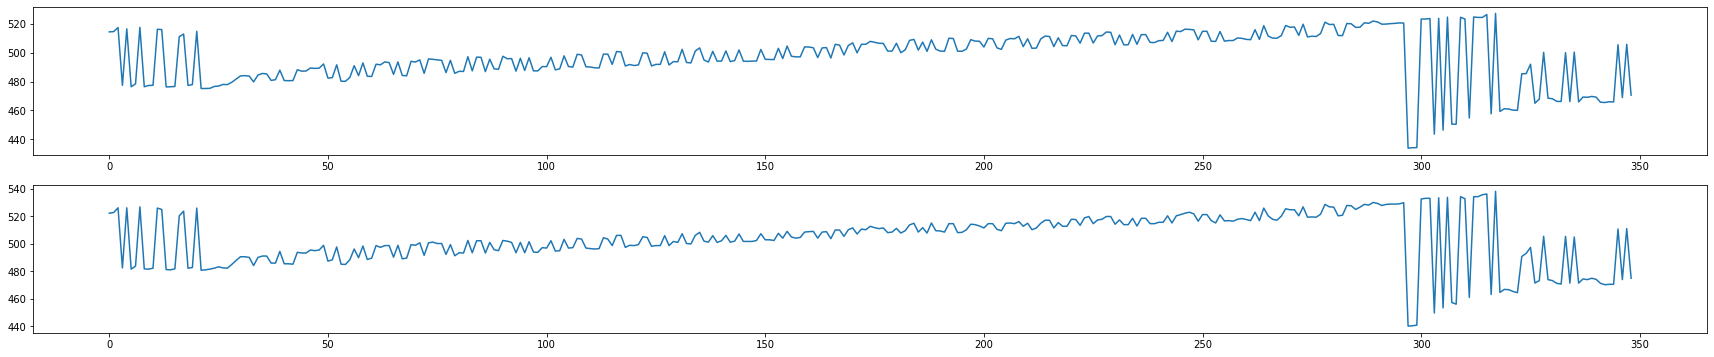

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(2,1,1)
plt.plot(trainto['X_11'])
plt.subplot(2,1,2)
plt.plot(trainto['X_12'])

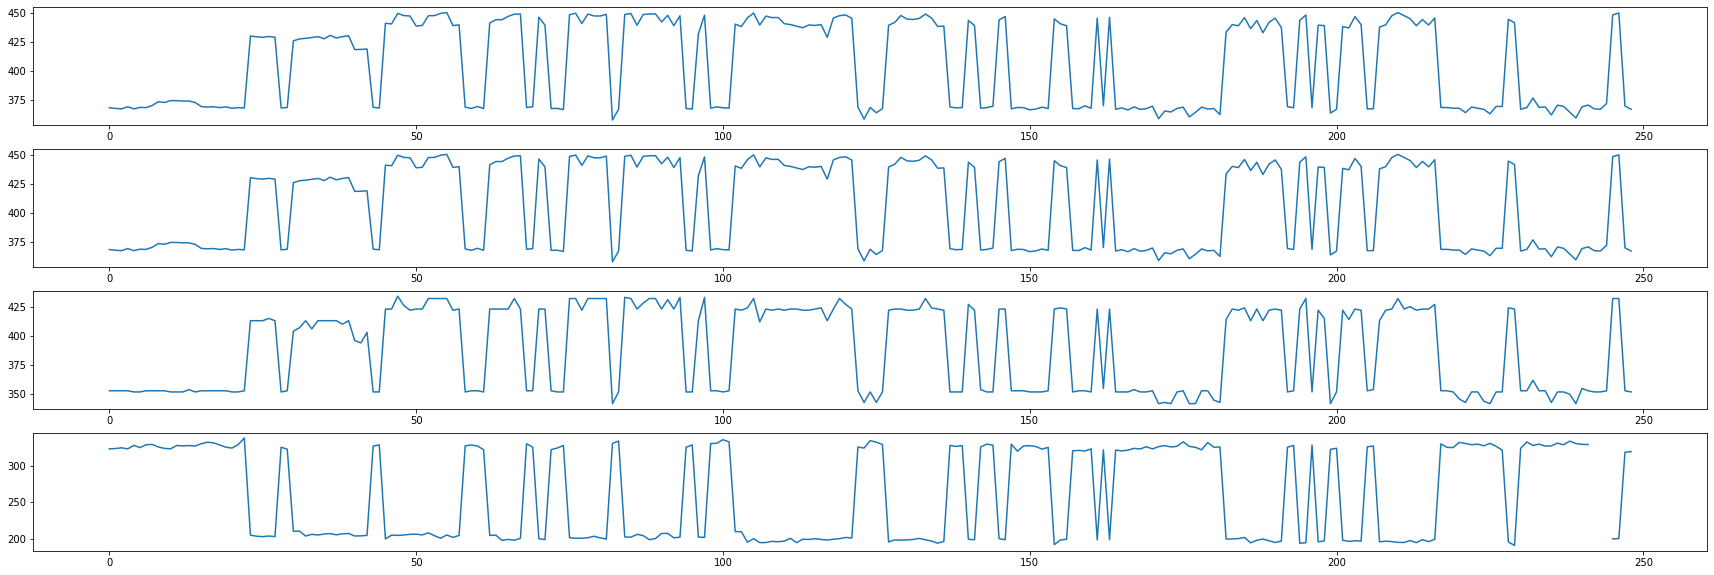

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(4,1,1)
plt.plot(train_a['X_2864'])
plt.subplot(4,1,2)
plt.plot(train_a['X_1129'])
plt.subplot(4,1,3)
plt.plot(train_a['X_2865'])
plt.subplot(4,1,4)
plt.plot(train_a['X_1421'])

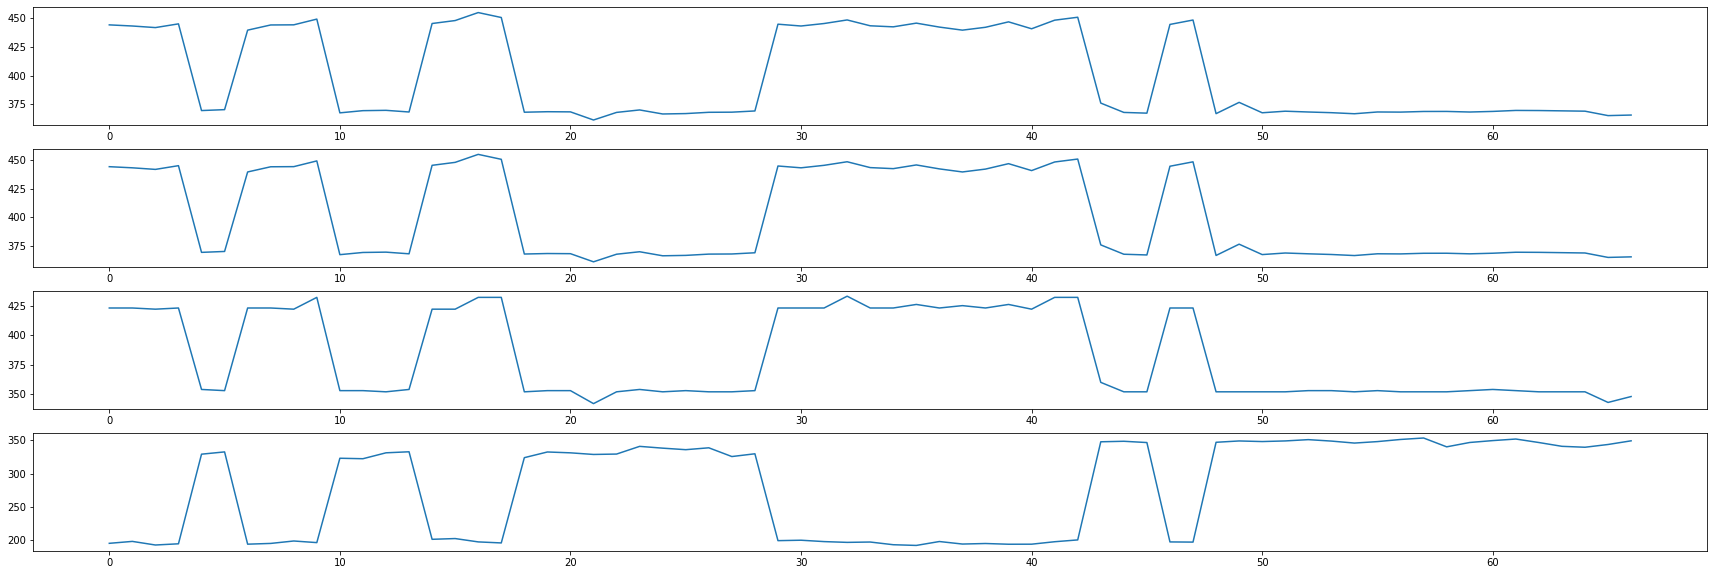

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(4,1,1)
plt.plot(test_a['X_2864'])
plt.subplot(4,1,2)
plt.plot(test_a['X_1129'])
plt.subplot(4,1,3)
plt.plot(test_a['X_2865'])
plt.subplot(4,1,4)
plt.plot(test_a['X_1421'])

In [ ]:
train_a.corr()['X_2864'].map(abs).sort_values(ascending=False)[:10]

X_1327    1.000000
X_1129    1.000000
X_2864    1.000000
X_2863    0.998265
X_1102    0.998265
X_1156    0.997083
X_2865    0.997083
X_1333    0.996013
X_1108    0.996013
X_1330    0.996013
Name: X_2864, dtype: float64

In [ ]:
test_a.corr()['X_2864'].map(abs).sort_values(ascending=False)[:10]

X_1327    1.000000
X_2864    1.000000
X_1129    1.000000
X_2863    0.998301
X_1102    0.998301
X_1332    0.998216
X_1335    0.998216
X_1113    0.998216
X_1156    0.998044
X_2865    0.998044
Name: X_2864, dtype: float64

In [ ]:
train_a.T[train_a.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
X_131,NaN,19854.0,NaN,19856.0,NaN,19859.0,NaN,19861.0,NaN,19864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_162,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,...,215.0,215.0,215.0,215.0,215.0,215.0,NaN,NaN,215.0,215.0
X_170,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,...,210.0,210.0,210.0,210.0,210.0,210.0,NaN,NaN,210.0,210.0
X_178,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,...,205.0,205.0,205.0,205.0,205.0,205.0,NaN,NaN,205.0,205.0
X_190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2866,39.34,38.89,39.19,37.74,38.7,38.16,32.5,39.0,42.25,34.4,...,55.74,47.93,47.19,NaN,50.88,51.71,NaN,NaN,49.47,NaN
X_2867,40.89,42.82,36.65,39.17,41.89,51.25,41.42,35.95,43.17,35.88,...,56.61,47.84,53.89,NaN,53.23,59.64,NaN,NaN,53.07,NaN
X_2868,32.56,43.92,42.47,52.17,46.93,56.01,38.36,59.51,55.6,50.36,...,40.51,40.46,52.97,NaN,52.44,54.61,NaN,NaN,50.89,NaN
X_2869,34.09,35.34,36.53,30.58,33.09,37.41,30.83,30.49,33.26,38.45,...,57.22,55.38,56.32,NaN,56.28,57.05,NaN,NaN,55.1,NaN


In [ ]:
test_a.T[test_a.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
X_129,NaN,NaN,NaN,NaN,18031.0,18064.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_143,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_162,NaN,NaN,NaN,NaN,215.0,215.0,NaN,NaN,NaN,NaN,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
X_170,NaN,NaN,NaN,NaN,210.0,210.0,NaN,NaN,NaN,NaN,...,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
X_178,NaN,NaN,NaN,NaN,205.0,205.0,NaN,NaN,NaN,NaN,...,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2866,NaN,NaN,NaN,NaN,57.74,53.18,NaN,NaN,NaN,NaN,...,50.45,48.51,51.86,53.12,52.5,52.97,54.24,58.06,53.55,53.94
X_2867,NaN,NaN,NaN,NaN,52.51,56.02,NaN,NaN,NaN,NaN,...,50.29,57.06,60.49,48.4,59.2,58.06,55.55,57.92,52.68,57.38
X_2868,NaN,NaN,NaN,NaN,54.45,41.79,NaN,NaN,NaN,NaN,...,57.54,52.85,40.29,55.97,54.16,44.11,51.6,49.06,49.97,42.37
X_2869,NaN,NaN,NaN,NaN,57.99,47.94,NaN,NaN,NaN,NaN,...,52.59,56.96,55.96,56.49,56.59,56.33,48.53,48.26,56.66,51.67


In [ ]:
train_a = train_a.fillna(-1)

In [ ]:
train_a.T[train_a.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
X_131,-1000.0,19854.0,-1000.0,19856.0,-1000.0,19859.0,-1000.0,19861.0,-1000.0,19864.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
X_162,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,...,215.0,215.0,215.0,215.0,215.0,215.0,-1000.0,-1000.0,215.0,215.0
X_170,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,...,210.0,210.0,210.0,210.0,210.0,210.0,-1000.0,-1000.0,210.0,210.0
X_178,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,...,205.0,205.0,205.0,205.0,205.0,205.0,-1000.0,-1000.0,205.0,205.0
X_190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2866,39.34,38.89,39.19,37.74,38.7,38.16,32.5,39.0,42.25,34.4,...,55.74,47.93,47.19,-1000.0,50.88,51.71,-1000.0,-1000.0,49.47,-1000.0
X_2867,40.89,42.82,36.65,39.17,41.89,51.25,41.42,35.95,43.17,35.88,...,56.61,47.84,53.89,-1000.0,53.23,59.64,-1000.0,-1000.0,53.07,-1000.0
X_2868,32.56,43.92,42.47,52.17,46.93,56.01,38.36,59.51,55.6,50.36,...,40.51,40.46,52.97,-1000.0,52.44,54.61,-1000.0,-1000.0,50.89,-1000.0
X_2869,34.09,35.34,36.53,30.58,33.09,37.41,30.83,30.49,33.26,38.45,...,57.22,55.38,56.32,-1000.0,56.28,57.05,-1000.0,-1000.0,55.1,-1000.0


In [ ]:
test_a = test_a.fillna(0)

In [ ]:
test_a.T[test_a.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
X_129,0.0,0.0,0.0,0.0,18031.0,18064.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_162,0.0,0.0,0.0,0.0,215.0,215.0,0.0,0.0,0.0,0.0,...,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0
X_170,0.0,0.0,0.0,0.0,210.0,210.0,0.0,0.0,0.0,0.0,...,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
X_178,0.0,0.0,0.0,0.0,205.0,205.0,0.0,0.0,0.0,0.0,...,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2866,0.0,0.0,0.0,0.0,57.74,53.18,0.0,0.0,0.0,0.0,...,50.45,48.51,51.86,53.12,52.5,52.97,54.24,58.06,53.55,53.94
X_2867,0.0,0.0,0.0,0.0,52.51,56.02,0.0,0.0,0.0,0.0,...,50.29,57.06,60.49,48.4,59.2,58.06,55.55,57.92,52.68,57.38
X_2868,0.0,0.0,0.0,0.0,54.45,41.79,0.0,0.0,0.0,0.0,...,57.54,52.85,40.29,55.97,54.16,44.11,51.6,49.06,49.97,42.37
X_2869,0.0,0.0,0.0,0.0,57.99,47.94,0.0,0.0,0.0,0.0,...,52.59,56.96,55.96,56.49,56.59,56.33,48.53,48.26,56.66,51.67


In [ ]:
train_a = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/trainA_31.csv')
test_a = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/testA_31.csv')
trainto = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/train_T_O.csv')
testto = pd.read_csv('/content/drive/MyDrive/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤/test_T_O.csv')

In [ ]:
train_dup_cols = train_a.T[train_a.T.duplicated()].index
test_dup_cols = test_a.T[test_a.T.duplicated()].index

In [ ]:
len(set(train_dup_cols) & set(test_dup_cols)), len(train_dup_cols)

(883, 884)

In [ ]:
set(train_dup_cols) - (set(train_dup_cols) & set(test_dup_cols))

{'X_131'}

In [ ]:
train_a['X_130'].values

array([   nan, 19854.,    nan, 19856.,    nan, 19859.,    nan, 19861.,
          nan, 19864.,    nan, 19866.,    nan, 19869.,    nan, 19871.,
          nan, 19874.,    nan, 19876.,    nan,    nan, 22589.,    nan,
          nan,    nan,    nan,    nan,    nan, 26155.,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,  6473.,  6482.,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan, 19631.,    nan,
          nan,    nan, 20594., 21289.,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
      

In [ ]:
train_a['X_131'].values

array([   nan, 19854.,    nan, 19856.,    nan, 19859.,    nan, 19861.,
          nan, 19864.,    nan, 19866.,    nan, 19869.,    nan, 19871.,
          nan, 19874.,    nan, 19876.,    nan,    nan, 22589.,    nan,
          nan,    nan,    nan,    nan,    nan, 26155.,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,  6473.,  6482.,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan, 19631.,    nan,
          nan,    nan, 20594., 21289.,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
      

In [ ]:
test_a['X_130'].values

array([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,  3370.,    nan,    nan,  4394.,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
         304.,   337.,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,  7614.,  7644.,  7786.,    nan,    nan,
       16202., 16231., 16282., 16287., 16292., 16297., 16702., 16735.,
       16808., 17014., 18533., 18565., 19029., 19061., 19591., 19621.,
       19646., 20153., 20183.])

In [ ]:
test_a['X_131'].values

array([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,  3370.,    nan,    nan,  4394.,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
        5134.,  5167.,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan, 12445., 12475., 12616.,    nan,    nan,
       21032., 21062., 21113., 21118., 21123., 21128., 21533., 21565.,
       21639., 21844., 23364., 23395., 23860., 23892., 24422., 24452.,
       24476., 24984., 25014.])

In [ ]:
trainto.T[trainto.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,339,340,341,342,343,344,345,346,347,348
X_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_25,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,...,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19
X_27,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,...,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0
X_28,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,...,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_926,157.235484,NaN,154.074194,151.096774,156.03871,153.574194,151.890323,155.829032,155.129032,159.1,...,150.46129,161.209677,155.1,154.309677,154.812903,154.777419,152.535484,155.43871,173.190323,167.087097
X_927,150.9,NaN,150.9,146.5,149.1,147.6,146.1,148.4,151.0,155.0,...,141.1,152.8,146.8,149.1,150.0,147.7,147.6,149.0,168.6,161.1
X_928,326.0,NaN,327.0,327.0,327.0,327.0,327.0,327.0,327.0,326.0,...,327.0,327.0,327.0,326.0,327.0,326.0,326.0,327.0,321.0,326.0
X_929,309.290909,NaN,310.854546,313.618182,312.109091,313.109091,309.636364,312.254546,312.553571,305.37037,...,311.818182,312.890909,306.709091,311.272727,313.4,313.472727,312.472727,313.363636,303.036364,304.818182


In [ ]:
testto.T[testto.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
X_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_25,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,...,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19
X_28,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,...,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0,155.0
X_31,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,...,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_926,154.37,148.177419,158.951613,162.477419,165.690323,166.164516,168.05,163.274193,165.248387,174.377419,...,151.793548,151.116129,153.664516,159.909677,153.290323,152.251613,154.83,150.909677,153.073333,152.412903
X_927,150.0,141.4,157.1,152.6,159.8,152.6,159.2,155.9,159.1,166.9,...,142.4,148.5,146.6,155.3,139.9,142.9,152.4,145.0,141.9,147.1
X_928,317.0,327.0,326.0,317.0,324.0,326.0,327.0,322.0,317.0,327.0,...,327.0,327.0,326.0,326.0,326.0,326.0,326.0,323.0,326.0,327.0
X_929,302.909091,312.6,306.327273,303.454545,304.854546,310.127273,313.0,304.509091,303.854546,312.854546,...,306.436364,312.745454,308.545455,311.309091,311.890909,313.072727,307.796296,304.418182,307.018182,308.163636
